## Compare Results

**Reasoning**:
Compare the optimal x and y values and the maximum objective function values obtained from both methods and print a summary.

In [24]:
print("--- Comparison of Results ---")
print(f"Graphical Method Optimal x1: {graphical_optimal_x1}")
print(f"Graphical Method Optimal x2: {graphical_optimal_x2}")
print(f"Graphical Method Maximum Value: {graphical_maximum_value}")
print("-" * 27)
print(f"Solver Method Optimal x1: {solver_optimal_x1}")
print(f"Solver Method Optimal x2: {solver_optimal_x2}")
print(f"Solver Method Maximum Value: {solver_maximum_value}")
print("-" * 27)

# Check if the results are approximately equal
tolerance = 1e-9 # Define a tolerance for floating-point comparison

if (abs(graphical_optimal_x1 - solver_optimal_x1) < tolerance and
    abs(graphical_optimal_x2 - solver_optimal_x2) < tolerance and
    abs(graphical_maximum_value - solver_maximum_value) < tolerance):
    print("The results from the graphical method and the solver are in agreement.")
else:
    print("The results from the graphical method and the solver differ.")

--- Comparison of Results ---
Graphical Method Optimal x1: 0.375
Graphical Method Optimal x2: 5.625
Graphical Method Maximum Value: 12.375
---------------------------
Solver Method Optimal x1: 0.375
Solver Method Optimal x2: 5.625
Solver Method Maximum Value: 12.375
---------------------------
The results from the graphical method and the solver are in agreement.


In [23]:
from scipy.optimize import linprog

# Objective function coefficients (negated for minimization)
# We'll use the coefficients from the previously defined objective P = 3x + 2y
c_linprog = [-3, -2]

# Inequality constraints coefficients and bounds from the previous 2-variable problem
# x + y <= 6
# 9x + y <= 9
A_ub = [
    [1, 1],
    [9, 1]
]
b_ub = [6, 9]

# Bounds for the variables (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)
bounds = [x_bounds, y_bounds]


# Call linprog
# The method='highs' is a good default, but others like 'simplex' can be specified
result = linprog(c_linprog, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Extract results
solver_optimal_x1 = result.x[0]
solver_optimal_x2 = result.x[1]
# Negate the objective function value because linprog minimizes
solver_maximum_value = -result.fun

# Print the results
print(f"Optimal x1 (from solver): {solver_optimal_x1}")
print(f"Optimal x2 (from solver): {solver_optimal_x2}")
print(f"Maximum objective function value (from solver): {solver_maximum_value}")

Optimal x1 (from solver): 0.375
Optimal x2 (from solver): 5.625
Maximum objective function value (from solver): 12.375


In [13]:
# Define the coefficients for the inequalities:
# x + y <= 6  => -x - y >= -6
# 9x + y <= 9 => -9x - y >= -9
# x >= 0
# y >= 0

# Coefficients of the inequality constraints (in the form Ax >= b)
A = [
    [-1, -1],
    [-9, -1],
    [-1, 0],  # for x >= 0  => -x <= 0 => -x >= 0
    [0, -1]   # for y >= 0  => -y <= 0 => -y >= 0
]

# Right-hand side of the inequality constraints
b = [-6, -9, 0, 0]

# Task
Find the corner points of the feasible region, graph the feasible set, find the corner point that maximizes the objective function $P=3x+2y$, introduce slack variables, find the corner points again using the concept of slack variables, and solve the linear programming problem using a built-in solver. Finally, compare the results obtained from the graphical method and the built-in solver.

## Define the problem (2 variables)

### Subtask:
Clearly define the system of inequalities and the objective function P=3x+2y for the 2-variable case, using the constraints from the previous problem: $x+y \le 6$, $9x+y \le 9$, $x \ge 0$, $y \ge 0$.


**Reasoning**:
Define the objective function coefficients, inequality constraints, and variable bounds as requested by the instructions.



In [14]:
# Define the coefficients of the objective function (P = 3x + 2y)
c = [3, 2]

# Define the coefficients of the inequality constraints:
# x + y <= 6
# 9x + y <= 9
# x >= 0
# y >= 0

# Coefficients of the inequality constraints (in the form Ax <= b)
A_ub = [
    [1, 1],
    [9, 1]
]

# Right-hand side of the inequality constraints
b_ub = [6, 9]

# Bounds for the variables (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)

## Graph the feasible set


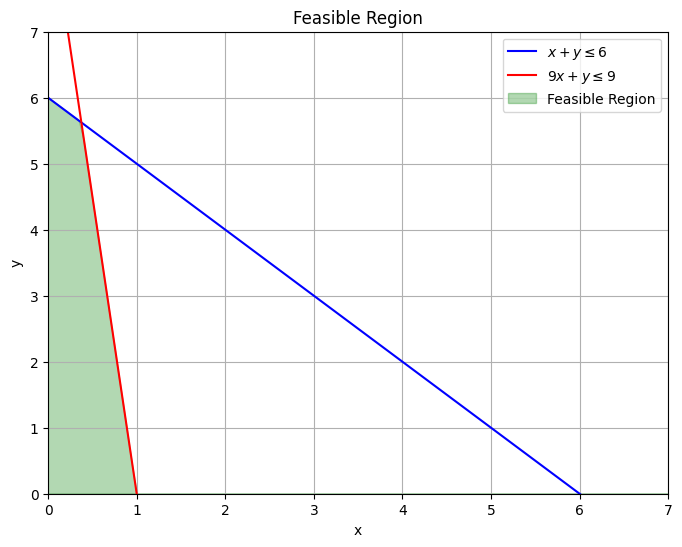

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(8, 6))

x = np.linspace(0, 10, 200)

# Plot boundary lines
y1 = 6 - x
y2 = 9 - 9 * x

ax.plot(x, y1, label=r'$x + y \leq 6$', color='blue')
ax.plot(x, y2, label=r'$9x + y \leq 9$', color='red')

# Fill the feasible region
y3 = np.maximum(0, 9 - 9 * x)
y4 = np.maximum(0, 6 - x)
y_fill = np.minimum(y3, y4)

ax.fill_between(x, 0, y_fill, where=(x >= 0), color='green', alpha=0.3, label='Feasible Region')

# Set plot limits
ax.set_xlim(0, 7)
ax.set_ylim(0, 7)

# Add labels and title
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Feasible Region')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()

## Find the corner points (graphical method)


In [17]:
# Boundary lines:
# L1: x = 0
# L2: y = 0
# L3: x + y = 6
# L4: 9x + y = 9

# Intersection of L1 (x=0) and L2 (y=0)
P1 = (0, 0)

# Intersection of L1 (x=0) and L3 (x + y = 6)
# 0 + y = 6 => y = 6
P2 = (0, 6)

# Intersection of L1 (x=0) and L4 (9x + y = 9)
# 9(0) + y = 9 => y = 9
P3 = (0, 9)

# Intersection of L2 (y=0) and L3 (x + y = 6)
# x + 0 = 6 => x = 6
P4 = (6, 0)

# Intersection of L2 (y=0) and L4 (9x + y = 9)
# 9x + 0 = 9 => 9x = 9 => x = 1
P5 = (1, 0)

# Intersection of L3 (x + y = 6) and L4 (9x + y = 9)
# Subtract L3 from L4: (9x + y) - (x + y) = 9 - 6 => 8x = 3 => x = 3/8
# Substitute x = 3/8 into L3: 3/8 + y = 6 => y = 6 - 3/8 = (48 - 3) / 8 = 45/8
P6 = (3/8, 45/8)

# Check if each intersection point is in the feasible region (satisfies all inequalities)
points = [P1, P2, P3, P4, P5, P6]
feasible_points = []

for p in points:
    x, y = p
    # Check x >= 0 and y >= 0
    if x >= 0 and y >= 0:
        # Check x + y <= 6
        if x + y <= 6:
            # Check 9x + y <= 9
            if 9 * x + y <= 9:
                feasible_points.append(p)

print("Corner points of the feasible region:", feasible_points)

Corner points of the feasible region: [(0, 0), (0, 6), (1, 0), (0.375, 5.625)]


## Evaluate the objective function at corner points


In [18]:
def objective_function(x, y):
  """Calculates the value of the objective function P = 3x + 2y."""
  return 3 * x + 2 * y

# Iterate through the feasible corner points and calculate P
corner_point_values = []
for point in feasible_points:
    x, y = point
    p_value = objective_function(x, y)
    corner_point_values.append((point, p_value))

# Print the corner points and their objective function values
print("Objective function values at each feasible corner point:")
for point, value in corner_point_values:
    print(f"Point: {point}, P = {value}")


Objective function values at each feasible corner point:
Point: (0, 0), P = 0
Point: (0, 6), P = 12
Point: (1, 0), P = 3
Point: (0.375, 5.625), P = 12.375


## Identify the optimal corner point (graphical method)

**Reasoning**:
Identify the corner point with the maximum objective function value and print it.



In [19]:
# Find the corner point with the maximum objective function value
optimal_point = None
maximum_value = -float('inf') # Initialize with a very small value

for point, value in corner_point_values:
    if value > maximum_value:
        maximum_value = value
        optimal_point = point

# Print the optimal corner point and the maximum value
print(f"\nThe corner point that maximizes the objective function is: {optimal_point}")
print(f"The maximum value of the objective function is: {maximum_value}")

graphical_optimal_x1 = optimal_point[0]
graphical_optimal_x2 = optimal_point[1]
graphical_maximum_value = maximum_value


The corner point that maximizes the objective function is: (0.375, 5.625)
The maximum value of the objective function is: 12.375


## Introduce slack variables

### Subtask:
Rewrite the inequality constraints as equalities by introducing slack variables.


In [20]:
# Original inequality constraints:
# x + y <= 6
# 9x + y <= 9
# x >= 0
# y >= 0

# Introduce slack variables s1 and s2 (where s1 >= 0, s2 >= 0) to convert inequalities to equalities:
# x + y + s1 = 6
# 9x + y + s2 = 9

print("New equations with slack variables:")
print("x + y + s1 = 6")
print("9x + y + s2 = 9")
print("where s1 >= 0 and s2 >= 0")

New equations with slack variables:
x + y + s1 = 6
9x + y + s2 = 9
where s1 >= 0 and s2 >= 0


## Set up for simplex method (optional but related to slack variables)


In [21]:
# 1. Objective function for Simplex (already in maximization form)
print("Objective function: Maximize P = 3x + 2y")

# 2. Equality constraints with slack variables (from previous step)
print("\nEquality constraints with slack variables:")
print("x + y + s1 = 6")
print("9x + y + s2 = 9")
print("x >= 0, y >= 0, s1 >= 0, s2 >= 0")

# 3. Initial Simplex Tableau structure
print("\nStructure of the Initial Simplex Tableau:")
print("-----------------------------------------------------------")
print("  |  x  |  y  | s1  | s2  | RHS |")
print("-----------------------------------------------------------")
print("s1|  1  |  1  |  1  |  0  |  6  |") # Row for the first constraint
print("s2|  9  |  1  |  0  |  1  |  9  |") # Row for the second constraint
print("-----------------------------------------------------------")
print("P | -3  | -2  |  0  |  0  |  0  |") # Row for the objective function (coefficients negated)
print("-----------------------------------------------------------")

# 4. Initial Basic and Non-Basic Variables
print("\nInitial Basic Variables: s1, s2")
print("Initial Non-Basic Variables: x, y")

Objective function: Maximize P = 3x + 2y

Equality constraints with slack variables:
x + y + s1 = 6
9x + y + s2 = 9
x >= 0, y >= 0, s1 >= 0, s2 >= 0

Structure of the Initial Simplex Tableau:
-----------------------------------------------------------
  |  x  |  y  | s1  | s2  | RHS |
-----------------------------------------------------------
s1|  1  |  1  |  1  |  0  |  6  |
s2|  9  |  1  |  0  |  1  |  9  |
-----------------------------------------------------------
P | -3  | -2  |  0  |  0  |  0  |
-----------------------------------------------------------

Initial Basic Variables: s1, s2
Initial Non-Basic Variables: x, y


## Solve using a built-in linear programming solver

In [22]:
from scipy.optimize import linprog

# Objective function coefficients (negated for minimization)
c_linprog = [-c[0], -c[1]]

# Call linprog
result = linprog(c_linprog, A_ub=A_ub, b_ub=b_ub, bounds=[x_bounds, y_bounds])

# Extract results
solver_optimal_x1 = result.x[0]
solver_optimal_x2 = result.x[1]
# Negate the objective function value because linprog minimizes
solver_maximum_value = -result.fun

# Print the results
print(f"Optimal x1 (from solver): {solver_optimal_x1}")
print(f"Optimal x2 (from solver): {solver_optimal_x2}")
print(f"Maximum objective function value (from solver): {solver_maximum_value}")

Optimal x1 (from solver): 0.375
Optimal x2 (from solver): 5.625
Maximum objective function value (from solver): 12.375


# Task
Write the equations that describe the problem completely using latex encoding, Find corner points, Graph feasible set, Find the corner that maximizes the objective function, Introduce slack variables, find the corner points again, and Solve using a built-in Linear Programming Solver. Compare your answers

## Define the problem and write equations in latex


In [25]:
from IPython.display import display, Markdown

# Define the decision variables
display(Markdown(r"## Decision Variables"))
display(Markdown(r"Let $x$ be the number of standard snowboards produced."))
display(Markdown(r"Let $y$ be the number of deluxe snowboards produced."))
display(Markdown(r"We must have $x \ge 0$ and $y \ge 0$ as we cannot produce a negative number of snowboards."))

# Define the objective function
display(Markdown(r"## Objective Function"))
display(Markdown(r"The objective is to maximize the total revenue, $R$."))
display(Markdown(r"The revenue from standard snowboards is $180x$ and from deluxe snowboards is $252y$."))
display(Markdown(r"The objective function is: $R = 180x + 252y$"))

# Define the constraints
display(Markdown(r"## Constraints"))
display(Markdown(r"There are constraints based on available production hours and material."))
display(Markdown(r"**Production Hours Constraint:** Each standard snowboard requires 13 hours and each deluxe requires 26 hours. There are 1040 hours available."))
display(Markdown(r"The constraint is: $13x + 26y \le 1040$"))
display(Markdown(r"**Material Constraint:** Each standard snowboard requires 75 units of material and each deluxe requires 90 units. There are 4500 units of material available."))
display(Markdown(r"The constraint is: $75x + 90y \le 4500$"))

display(Markdown(r"**Non-negativity Constraints:**"))
display(Markdown(r"$x \ge 0$"))
display(Markdown(r"$y \ge 0$"))

display(Markdown(r"## Summary of the Linear Programming Problem"))
display(Markdown(r"Maximize $R = 180x + 252y$"))
display(Markdown(r"Subject to:"))
display(Markdown(r"$13x + 26y \le 1040$"))
display(Markdown(r"$75x + 90y \le 4500$"))
display(Markdown(r"$x \ge 0$"))
display(Markdown(r"$y \ge 0$"))

## Decision Variables

Let $x$ be the number of standard snowboards produced.

Let $y$ be the number of deluxe snowboards produced.

We must have $x \ge 0$ and $y \ge 0$ as we cannot produce a negative number of snowboards.

## Objective Function

The objective is to maximize the total revenue, $R$.

The revenue from standard snowboards is $180x$ and from deluxe snowboards is $252y$.

The objective function is: $R = 180x + 252y$

## Constraints

There are constraints based on available production hours and material.

**Production Hours Constraint:** Each standard snowboard requires 13 hours and each deluxe requires 26 hours. There are 1040 hours available.

The constraint is: $13x + 26y \le 1040$

**Material Constraint:** Each standard snowboard requires 75 units of material and each deluxe requires 90 units. There are 4500 units of material available.

The constraint is: $75x + 90y \le 4500$

**Non-negativity Constraints:**

$x \ge 0$

$y \ge 0$

## Summary of the Linear Programming Problem

Maximize $R = 180x + 252y$

Subject to:

$13x + 26y \le 1040$

$75x + 90y \le 4500$

$x \ge 0$

$y \ge 0$

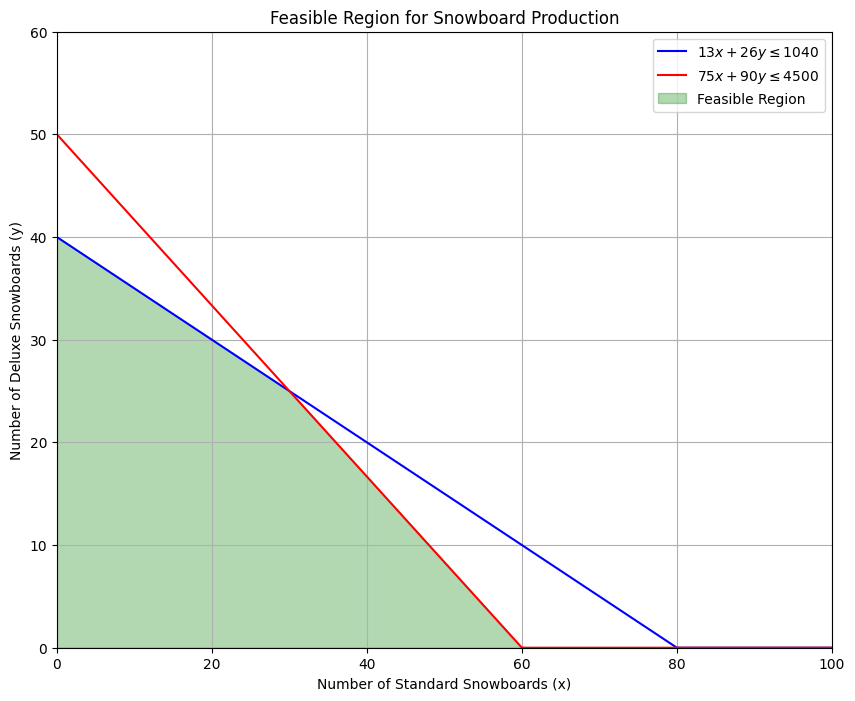

In [27]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(figsize=(10, 8))

x = np.linspace(0, 100, 400) # Range for standard snowboards

# Constraint 1: 13x + 26y <= 1040 => 26y <= 1040 - 13x => y <= (1040 - 13x) / 26
y1 = (1040 - 13 * x) / 26
y1[y1 < 0] = 0 # Apply non-negativity constraint for y

# Constraint 2: 75x + 90y <= 4500 => 90y <= 4500 - 75x => y <= (4500 - 75x) / 90
y2 = (4500 - 75 * x) / 90
y2[y2 < 0] = 0 # Apply non-negativity constraint for y

# Plot boundary lines
ax.plot(x, y1, label=r'$13x + 26y \leq 1040$', color='blue')
ax.plot(x, y2, label=r'$75x + 90y \leq 4500$', color='red')

# Fill the feasible region
# The feasible region is below both lines and above y=0 and to the right of x=0
y_feasible = np.minimum(y1, y2)
ax.fill_between(x, 0, y_feasible, where=(x >= 0), color='green', alpha=0.3, label='Feasible Region')

# Set plot limits
ax.set_xlim(0, 100)
ax.set_ylim(0, 60)

# Add labels and title
ax.set_xlabel('Number of Standard Snowboards (x)')
ax.set_ylabel('Number of Deluxe Snowboards (y)')
ax.set_title('Feasible Region for Snowboard Production')

# Add legend and grid
ax.legend()
ax.grid(True)

plt.show()

## Find the corner points (graphical method)

### Subtask:
Calculate the coordinates of the vertices of the feasible region by finding the intersection points of the boundary lines within the feasible region.


**Reasoning**:
Identify the boundary lines, calculate intersection points, check feasibility, and store the feasible corner points.



In [28]:
# Identify the equations of the boundary lines:
# L1: x = 0 (Non-negativity constraint for x)
# L2: y = 0 (Non-negativity constraint for y)
# L3: 13x + 26y = 1040 (Production Hours Constraint)
# L4: 75x + 90y = 4500 (Material Constraint)

# Find the intersection points:

# Intersection of L1 (x=0) and L2 (y=0)
P1 = (0, 0)

# Intersection of L1 (x=0) and L3 (13x + 26y = 1040)
# 13(0) + 26y = 1040 => 26y = 1040 => y = 1040 / 26 = 40
P2 = (0, 40)

# Intersection of L1 (x=0) and L4 (75x + 90y = 4500)
# 75(0) + 90y = 4500 => 90y = 4500 => y = 4500 / 90 = 50
P3 = (0, 50) # Note: This point might not be feasible

# Intersection of L2 (y=0) and L3 (13x + 26y = 1040)
# 13x + 26(0) = 1040 => 13x = 1040 => x = 1040 / 13 = 80
P4 = (80, 0)

# Intersection of L2 (y=0) and L4 (75x + 90y = 4500)
# 75x + 90(0) = 4500 => 75x = 4500 => x = 4500 / 75 = 60
P5 = (60, 0)

# Intersection of L3 (13x + 26y = 1040) and L4 (75x + 90y = 4500)
# We can use substitution or elimination. Let's use elimination.
# Multiply L3 by 75 and L4 by 13 to eliminate x:
# 75 * (13x + 26y) = 75 * 1040  => 975x + 1950y = 78000
# 13 * (75x + 90y) = 13 * 4500  => 975x + 1170y = 58500
# Subtract the second new equation from the first:
# (975x + 1950y) - (975x + 1170y) = 78000 - 58500
# 780y = 19500
# y = 19500 / 780 = 25

# Substitute y = 25 into L3:
# 13x + 26(25) = 1040
# 13x + 650 = 1040
# 13x = 1040 - 650
# 13x = 390
# x = 390 / 13 = 30
P6 = (30, 25)

# Check if each intersection point is in the feasible region (satisfies all inequalities)
points = [P1, P2, P3, P4, P5, P6]
feasible_points = []

for p in points:
    x, y = p
    # Check non-negativity constraints
    if x >= 0 and y >= 0:
        # Check Production Hours Constraint: 13x + 26y <= 1040
        if 13 * x + 26 * y <= 1040:
            # Check Material Constraint: 75x + 90y <= 4500
            if 75 * x + 90 * y <= 4500:
                feasible_points.append(p)

print("Corner points of the feasible region:", feasible_points)

Corner points of the feasible region: [(0, 0), (0, 40), (60, 0), (30, 25)]


## Evaluate the objective function at corner points


In [29]:
def calculate_revenue(x, y):
  """Calculates the total revenue for a given number of standard and deluxe snowboards."""
  return 180 * x + 252 * y

# Iterate through the feasible corner points and calculate the revenue
corner_point_revenues = []
for point in feasible_points:
    x, y = point
    revenue = calculate_revenue(x, y)
    corner_point_revenues.append((point, revenue))

# Print the corner points and their corresponding revenue values
print("Revenue at each feasible corner point:")
for point, revenue in corner_point_revenues:
    print(f"Point: {point}, Revenue = ${revenue}")

Revenue at each feasible corner point:
Point: (0, 0), Revenue = $0
Point: (0, 40), Revenue = $10080
Point: (60, 0), Revenue = $10800
Point: (30, 25), Revenue = $11700


## Identify the optimal corner point (graphical method)



**Reasoning**:
Identify the corner point with the maximum objective function value and print it, then store the optimal x, y, and maximum revenue in specified variables.



In [30]:
# Find the corner point with the maximum objective function value
optimal_point = None
maximum_value = -float('inf') # Initialize with a very small value

for point, value in corner_point_revenues:
    if value > maximum_value:
        maximum_value = value
        optimal_point = point

# Print the optimal corner point and the maximum value
print(f"\nThe corner point that maximizes the objective function is: {optimal_point}")
print(f"The maximum value of the objective function is: ${maximum_value}")

# Store the results in the specified variables
graphical_optimal_x = optimal_point[0]
graphical_optimal_y = optimal_point[1]
graphical_maximum_revenue = maximum_value


The corner point that maximizes the objective function is: (30, 25)
The maximum value of the objective function is: $11700


## Introduce slack variables



In [31]:
# Original inequality constraints:
# 13x + 26y <= 1040
# 75x + 90y <= 4500
# x >= 0
# y >= 0

print("Original inequality constraints:")
print("13x + 26y <= 1040")
print("75x + 90y <= 4500")
print("x >= 0")
print("y >= 0")

# Introduce slack variables s1 and s2 (where s1 >= 0, s2 >= 0) to convert inequalities to equalities:
# 13x + 26y + s1 = 1040
# 75x + 90y + s2 = 4500

print("\nNew equality constraints with slack variables:")
print("13x + 26y + s1 = 1040")
print("75x + 90y + s2 = 4500")
print("where s1 >= 0 and s2 >= 0")

Original inequality constraints:
13x + 26y <= 1040
75x + 90y <= 4500
x >= 0
y >= 0

New equality constraints with slack variables:
13x + 26y + s1 = 1040
75x + 90y + s2 = 4500
where s1 >= 0 and s2 >= 0


## Set up for simplex method (optional but related to slack variables)


In [32]:
# 1. Objective function for Simplex (already in maximization form)
print("Objective function: Maximize R = 180x + 252y")

# 2. Equality constraints with slack variables (from previous step)
print("\nEquality constraints with slack variables:")
print("13x + 26y + s1 = 1040")
print("75x + 90y + s2 = 4500")
print("x >= 0, y >= 0, s1 >= 0, s2 >= 0")

# 3. Initial Simplex Tableau structure
print("\nStructure of the Initial Simplex Tableau:")
print("-----------------------------------------------------------")
print("  |  x  |  y  | s1  | s2  | RHS |")
print("-----------------------------------------------------------")
print("s1|  13 |  26 |  1  |  0  | 1040|") # Row for the first constraint
print("s2|  75 |  90 |  0  |  1  | 4500|") # Row for the second constraint
print("-----------------------------------------------------------")
print("R | -180| -252|  0  |  0  |  0  |") # Row for the objective function (coefficients negated)
print("-----------------------------------------------------------")

# 4. Initial Basic and Non-Basic Variables
print("\nInitial Basic Variables: s1, s2")
print("Initial Non-Basic Variables: x, y")

Objective function: Maximize R = 180x + 252y

Equality constraints with slack variables:
13x + 26y + s1 = 1040
75x + 90y + s2 = 4500
x >= 0, y >= 0, s1 >= 0, s2 >= 0

Structure of the Initial Simplex Tableau:
-----------------------------------------------------------
  |  x  |  y  | s1  | s2  | RHS |
-----------------------------------------------------------
s1|  13 |  26 |  1  |  0  | 1040|
s2|  75 |  90 |  0  |  1  | 4500|
-----------------------------------------------------------
R | -180| -252|  0  |  0  |  0  |
-----------------------------------------------------------

Initial Basic Variables: s1, s2
Initial Non-Basic Variables: x, y


## Solve using a built-in linear programming solver


In [33]:
from scipy.optimize import linprog

# Objective function coefficients (negated for minimization)
# Maximize R = 180x + 252y
# Minimize -R = -180x - 252y
c_linprog = [-180, -252]

# Inequality constraints coefficients and bounds
# 13x + 26y <= 1040
# 75x + 90y <= 4500
# x >= 0, y >= 0
A_ub = [
    [13, 26],
    [75, 90]
]
b_ub = [1040, 4500]

# Bounds for the variables (x >= 0, y >= 0)
x_bounds = (0, None)
y_bounds = (0, None)
bounds = [x_bounds, y_bounds]

# Call linprog
result = linprog(c_linprog, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

# Extract results
solver_optimal_x1 = result.x[0] # Optimal number of standard snowboards
solver_optimal_x2 = result.x[1] # Optimal number of deluxe snowboards
# Negate the objective function value because linprog minimizes
solver_maximum_value = -result.fun # Maximum revenue

# Print the results
print(f"Optimal number of Standard Snowboards (from solver): {solver_optimal_x1}")
print(f"Optimal number of Deluxe Snowboards (from solver): {solver_optimal_x2}")
print(f"Maximum revenue (from solver): ${solver_maximum_value}")

Optimal number of Standard Snowboards (from solver): 29.999999999999968
Optimal number of Deluxe Snowboards (from solver): 25.000000000000025
Maximum revenue (from solver): $11700.0


## Compare results:
Compare the optimal number of standard and deluxe snowboards and the maximum revenue obtained from both the graphical method and the built-in solver and print a summary.


In [34]:
print("--- Comparison of Results ---")
print(f"Graphical Method Optimal Standard Snowboards: {graphical_optimal_x}")
print(f"Graphical Method Optimal Deluxe Snowboards: {graphical_optimal_y}")
print(f"Graphical Method Maximum Revenue: ${graphical_maximum_revenue}")
print("-" * 27)
print(f"Solver Method Optimal Standard Snowboards: {solver_optimal_x1}")
print(f"Solver Method Optimal Deluxe Snowboards: {solver_optimal_x2}")
print(f"Solver Method Maximum Revenue: ${solver_maximum_value}")
print("-" * 27)

# Check if the results are approximately equal
tolerance = 1e-9 # Define a tolerance for floating-point comparison

if (abs(graphical_optimal_x - solver_optimal_x1) < tolerance and
    abs(graphical_optimal_y - solver_optimal_x2) < tolerance and
    abs(graphical_maximum_revenue - solver_maximum_value) < tolerance):
    print("The results from the graphical method and the solver are in agreement.")
else:
    print("The results from the graphical method and the solver differ.")

--- Comparison of Results ---
Graphical Method Optimal Standard Snowboards: 30
Graphical Method Optimal Deluxe Snowboards: 25
Graphical Method Maximum Revenue: $11700
---------------------------
Solver Method Optimal Standard Snowboards: 29.999999999999968
Solver Method Optimal Deluxe Snowboards: 25.000000000000025
Solver Method Maximum Revenue: $11700.0
---------------------------
The results from the graphical method and the solver are in agreement.
